In [1]:
from ipynb.fs.full.quantumsystem import QuantumSystem, qs

In [2]:
class Modifier(QuantumSystem.System):
    """ Value to adjust Dice Roll Target for Attack """

In [3]:
class Damage(QuantumSystem.System):
    """ Damage done on a successful Attack """

In [4]:
class Targeting(QuantumSystem.HyperSystem):
    """ Ranged attack modifier and damage values """
    systems = [Modifier, Damage]

In [5]:
class ShortRangeWeapons(QuantumSystem.MetaSystem):
    """ asdf """
    systems = [Targeting]

class MidRangeWeapons(QuantumSystem.MetaSystem):
    """ asdf """
    systems = [Targeting]

class LongRangeWeapons(QuantumSystem.MetaSystem):
    """ asdf """
    systems = [Targeting]

In [6]:
class OverheatValue(QuantumSystem.System):
    edge_name = "overheat_value"

In [7]:
class OverheatDamage(QuantumSystem.System):
    edge_name = "overheat_damage"

In [8]:
class Overheat(QuantumSystem.HyperSystem):
    systems = [OverheatValue, OverheatDamage]

In [9]:
class Weapons(QuantumSystem.HyperSystem):
    systems = [ShortRangeWeapons, MidRangeWeapons, LongRangeWeapons, Overheat]

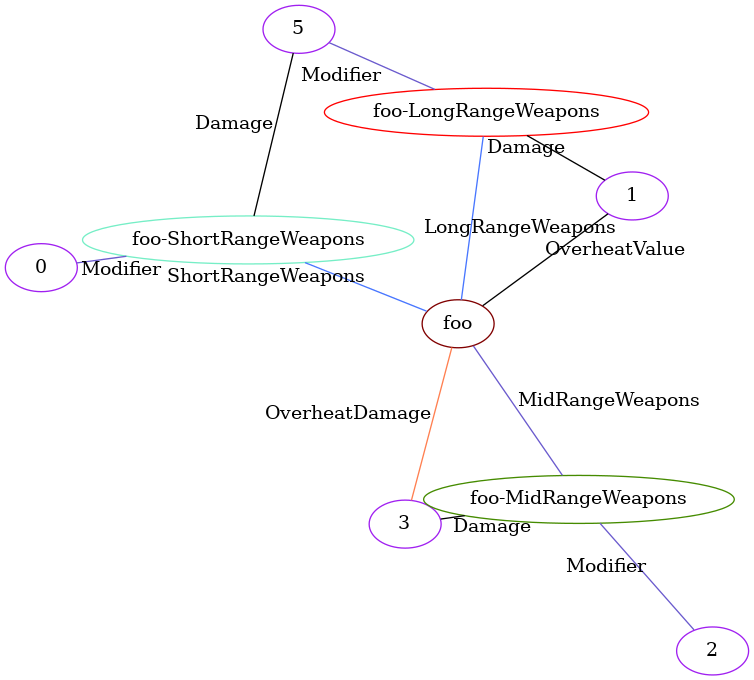

In [10]:
if __name__ == "__main__":
    from IPython.display import display
    qs.reset()
    Weapons.build_system(anchor="foo", terminants={
        "ShortRangeWeapons": [{"Modifier": "0", "Damage": "5"}],
        "MidRangeWeapons": [{"Modifier": "2", "Damage": "3"}],
        "LongRangeWeapons": [{"Modifier": "5", "Damage": "1"}],
        "Overheat": {"OverheatValue": "1", "OverheatDamage": "3"}
    })
    display(qs.render())

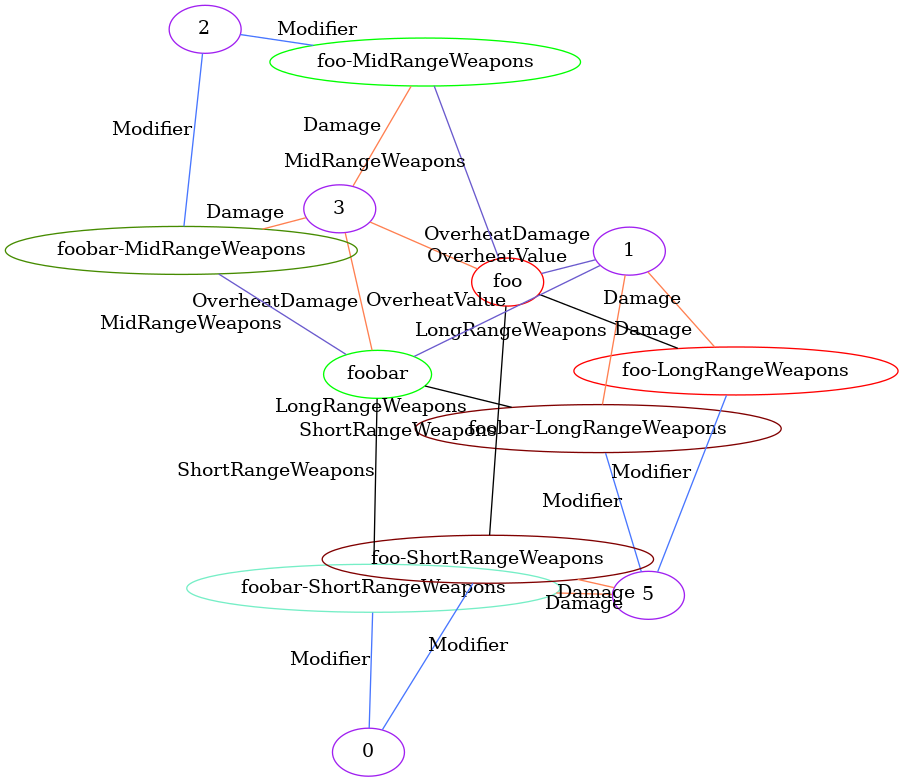

In [11]:
if __name__ == "__main__":
    from IPython.display import display
    Weapons.build_system("foobar", [[["0", "5"]], [["2", "3"]], [["5", "1"]], ["1", "3"]])
    display(qs.render())